In [1]:
from policy_network import *
# from utils import *
import gymnasium as gym
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

env = gym.make('CartPole-v1')


2023-06-22 22:44:04.259561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 22:44:04.909976: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-22 22:44:04.910063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-22 22:44:04.910069: W tensorflow/compiler/tf2tenso

In [2]:

inp = Input(shape=(4,))
x = Dense(200, activation='relu')(inp)
x = Dense(200, activation='relu')(x)
out = Dense(2, activation='softmax')(x)
model = Model(inp, out)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001))


exp_replay = ExperienceReplay(max_memory=300)
# traget_net = TargetNetwork(model)
agent = PolicyNetwork(model, env, exp_replay, batch_size=100, max_time=200, gamma=0.99)



2023-06-22 22:44:06.230749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 22:44:06.254241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 22:44:06.254607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 22:44:06.255344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

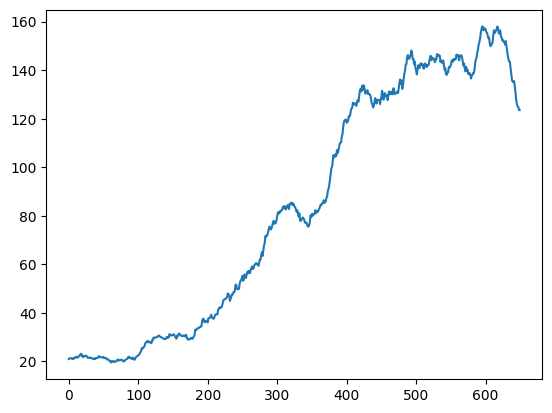

In [9]:
avg_sum = []
for i in range(len(agent.history)-50):
    avg_sum.append(np.mean(agent.history[i:i+50]))
plt.plot(avg_sum)
plt.show()

In [5]:
# import pickle
# with open('cartpole.pkl', 'wb') as f:
#     pickle.dump(model, f)
